## - IMPORT LIBRAIRIES

In [1]:
%matplotlib notebook
 

import numpy as np
import scipy
import math
from scipy import sparse, linalg, spatial

from matplotlib import pyplot as plt


from pyunlocbox import functions, solvers
import pandas as pd
import networkx as nx

## - LOAD ADJACENCY

In [2]:
adjacency = np.load('../Milestone_1/adjacency.npy')
n_nodes = np.size(adjacency,1) # the number of nodes in the network
n_edges = sum(sum(adjacency!=0))/2 # number of edges in the network
degrees = sum(adjacency!=0)

## - GRAPH COMPUTING

In [3]:
G = nx.Graph()
G = nx.from_numpy_matrix(adjacency)

## - LAYOUT CHOICE

In [4]:
pos = nx.spring_layout(G)

## - GRAPH VISUALIZATION

<IPython.core.display.Javascript object>


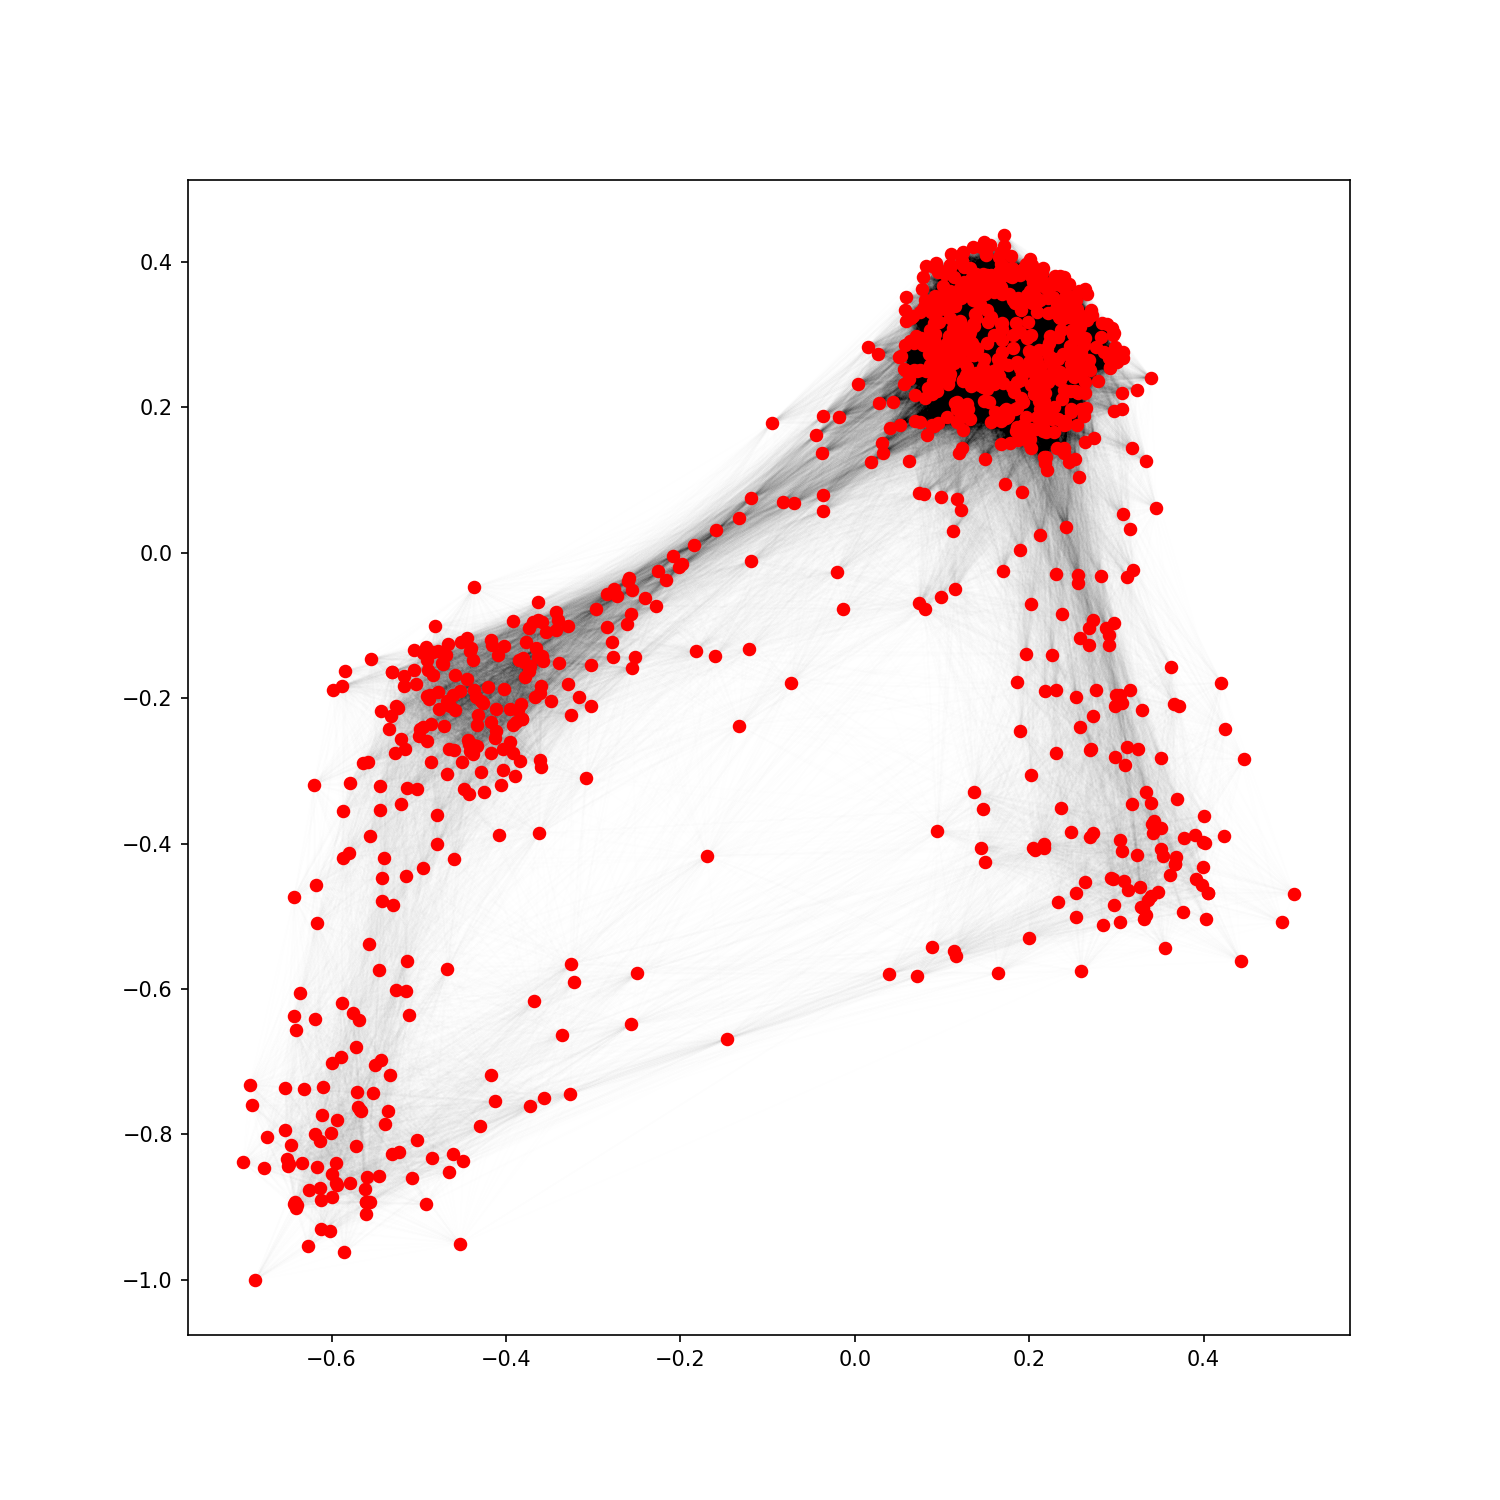

In [5]:
plt.figure(figsize = (10,10))
nx.draw_networkx_nodes(G, pos, node_size=30)
nx.draw_networkx_edges(G, pos, alpha =0.005)

## - NODE SELECTION

<IPython.core.display.Javascript object>


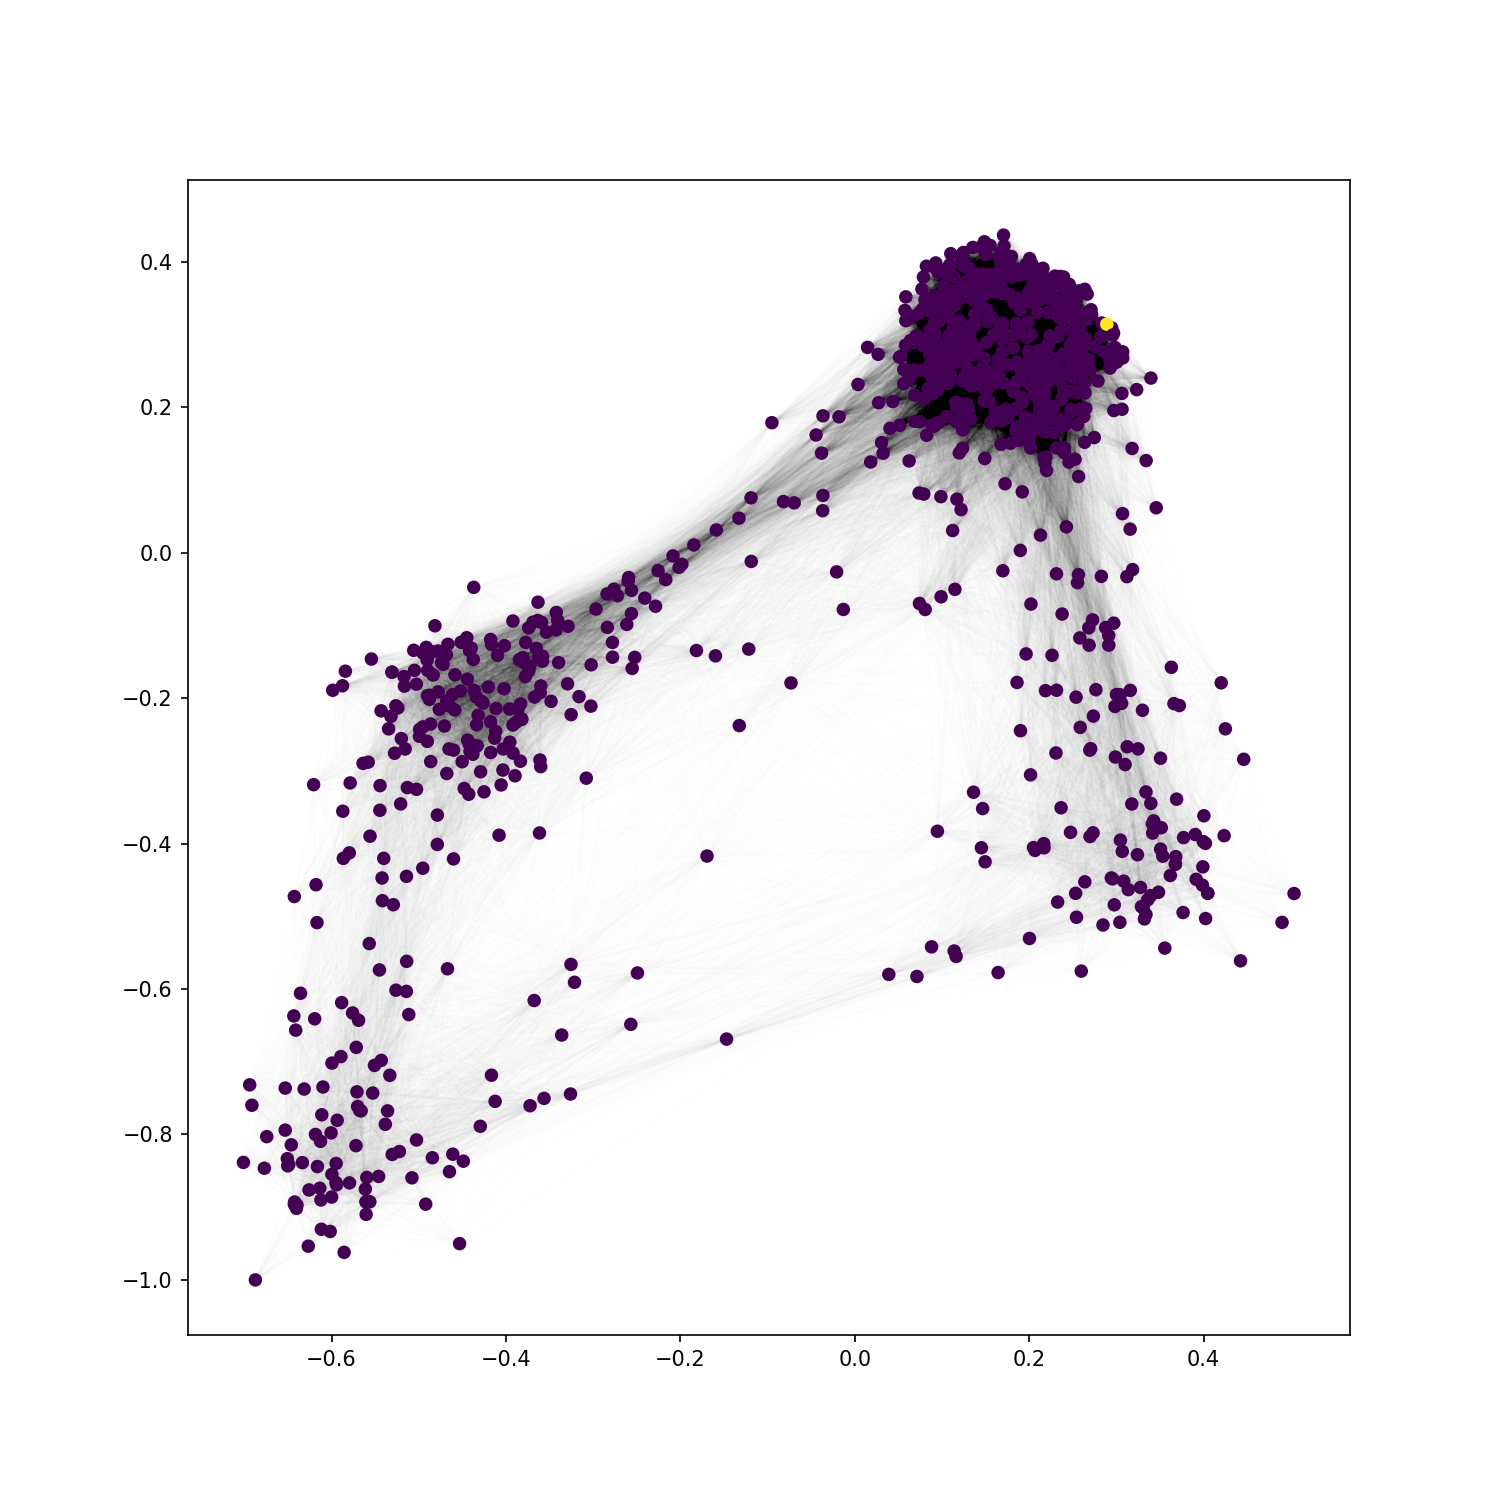

In [6]:
selected_nodes = [400, 800]
max_length = 2

color = np.ones((n_nodes))
color[selected_nodes] = 5
plt.figure(figsize = (10,10))
nx.draw_networkx_nodes(G, pos, node_size=30, node_color=color)
nx.draw_networkx_edges(G, pos, alpha =0.005)

## - COMPUTE PATHS

In [7]:
paths = nx.all_simple_paths(G, selected_nodes[0], selected_nodes[1], max_length)
list_paths = list(paths)
list_paths

[[400, 0, 800],
 [400, 1, 800],
 [400, 6, 800],
 [400, 11, 800],
 [400, 15, 800],
 [400, 17, 800],
 [400, 23, 800],
 [400, 24, 800],
 [400, 25, 800],
 [400, 26, 800],
 [400, 29, 800],
 [400, 34, 800],
 [400, 35, 800],
 [400, 36, 800],
 [400, 37, 800],
 [400, 38, 800],
 [400, 39, 800],
 [400, 40, 800],
 [400, 41, 800],
 [400, 42, 800],
 [400, 43, 800],
 [400, 45, 800],
 [400, 49, 800],
 [400, 59, 800],
 [400, 60, 800],
 [400, 63, 800],
 [400, 78, 800],
 [400, 80, 800],
 [400, 82, 800],
 [400, 92, 800],
 [400, 95, 800],
 [400, 96, 800],
 [400, 97, 800],
 [400, 102, 800],
 [400, 105, 800],
 [400, 109, 800],
 [400, 111, 800],
 [400, 112, 800],
 [400, 132, 800],
 [400, 145, 800],
 [400, 147, 800],
 [400, 148, 800],
 [400, 155, 800],
 [400, 160, 800],
 [400, 163, 800],
 [400, 171, 800],
 [400, 174, 800],
 [400, 175, 800],
 [400, 176, 800],
 [400, 189, 800],
 [400, 193, 800],
 [400, 194, 800],
 [400, 198, 800],
 [400, 202, 800],
 [400, 207, 800],
 [400, 210, 800],
 [400, 224, 800],
 [400, 232

## - COMPUTE SMOOTHNESS

The smoothness of a signal can be computed by the quadratic form

$$ f^\intercal L f = \| \nabla_\mathcal{G} f \|_2^2 = \sum_{i \sim j} W_{ij} (f_j - f_i)^2 $$

In [8]:
xypos = np.zeros((len(pos),2))

for i in range(0,len(pos)):
    xypos[i][0] = pos[i][0]
    xypos[i][1] = pos[i][1]

In [9]:
class onClick(object):
    def __init__(self, xypos, ax=None, fig =None):
        if ax is None:
            self.ax = plt.gca
        else:
            self.ax = ax
        if fig is None:
            self.fig = plt.gcf
        else:
            self.fig = fig
        self.xy = []
        self.xypos = xypos
        self.clickedPos = []
        self.nbNodes = 2
        self.nbClicks = 0
        self.scats = []
        self.d = []
        self.selectedNodes = []
        self.xplot = []
        self.yplot = []
        
    def __call__(self, event):
        self.nbClicks += 1
        clickX = event.xdata
        clickY = event.ydata
        self.clickedPos.append([clickX, clickY])
        
        if self.nbClicks == 1:
            self.xy = [[clickX, clickY],[clickX, clickY]]
        else:
            self.xy = self.clickedPos[len(self.clickedPos)-self.nbNodes:]
            ax.collections.remove(self.scats[self.nbClicks-2])
            
        self.d = scipy.spatial.distance.cdist(self.xypos, self.xy).transpose()
        self.selectedNodes = np.argmin(self.d, 1)
        
        self.xplot = [self.xypos[self.selectedNodes][0][0], self.xypos[self.selectedNodes][1][0]]
        self.yplot = [self.xypos[self.selectedNodes][0][1], self.xypos[self.selectedNodes][1][1]]
        newScat = ax.scatter(self.xplot, self.yplot)
        self.scats.append(newScat)
        

        
        #ax.collections.remove(self.scats[self.nbClicks-self.nbNodes])
        
        fig.canvas.draw()

<IPython.core.display.Javascript object>


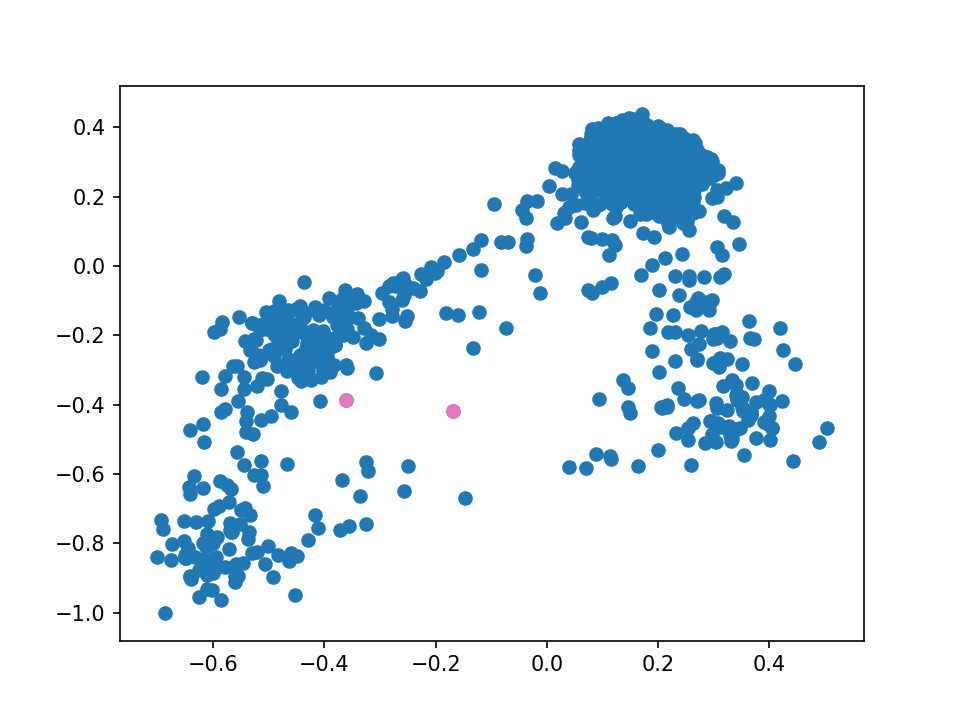

In [10]:
plt.ion()
fig,ax = plt.subplots()
initScat = ax.scatter(xypos[:, 0],xypos[:, 1])

oc = onClick(xypos, ax=ax)

cid = fig.canvas.mpl_connect('button_press_event', oc)

In [11]:
fig.canvas.mpl_disconnect(cid)

In [12]:
oc.xplot
oc.nbClicks-oc.nbNodes-1

3

In [13]:
ax.collections

In [14]:
oc.scats

In [15]:
oc.selectedNodes

array([187, 339], dtype=int64)